Notebook to generate paths compatible with matplotlib from any system font

In [1]:
import io
import xml.etree.ElementTree as ET

import svgpath2mpl

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.path import Path
import matplotlib.patches as patches

0

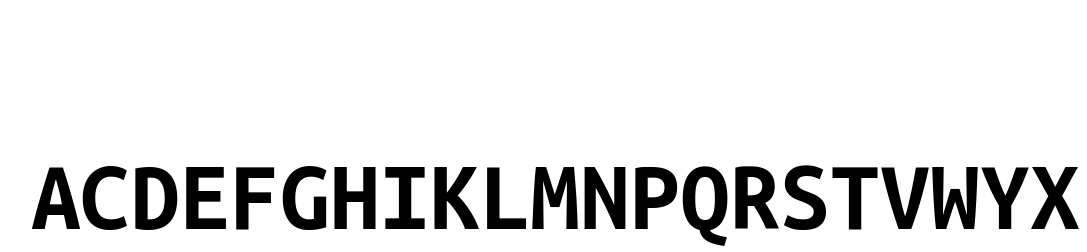

In [2]:
fig, ax = plt.subplots()

RES = 'ACDEFGHIKLMNPQRSTVWYX'

#FONTNAME = 'DejaVu Sans Mono'
FONTNAME = 'Ubuntu Mono'

ax.text(0, 0, RES, fontdict=dict(fontsize=100, fontname=FONTNAME, fontweight=1000))
ax.axis('off')

out = io.StringIO()
fig.savefig(out, format='svg')
out.seek(0)

In [3]:
tree = ET.parse(out)
root = tree.getroot()
root

mplpaths = {}

elemiter = root.findall('*/*/*/[@id="text_1"]/{http://www.w3.org/2000/svg}defs/{http://www.w3.org/2000/svg}path')
for res, ep in zip(RES, elemiter):
    pathdef = ep.attrib['d']
    
    codes = []
    verts = []
    for c, v in svgpath2mpl._parse_path(pathdef, 0+0j):
        codes.extend(c)
        verts.extend(v)

    verts = np.array(verts)
    verts = verts - np.min(verts, axis=0)
    verts = verts / np.max(verts, axis=0)
    #verts[:, 1] = 1 - verts[:, 1]
    
    mplpaths[res] = (verts, codes)

(0, 21)

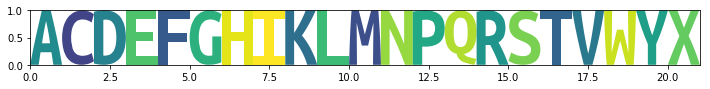

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 1)

cm = mpl.cm.ScalarMappable(cmap='viridis')
cm.set_clim(-5, len(RES) - 1)

clrs = np.random.permutation(len(RES))

for i, res in enumerate(RES):
    verts, codes = mplpaths[res]
    verts = verts + np.array([i, 0])
    path = Path(verts, codes)
    patch = patches.PathPatch(path, facecolor=cm.to_rgba(clrs[i]), lw=0)
    ax.add_patch(patch)
    
ax.set_xlim(0, len(RES))

In [5]:
print(f"'{FONTNAME}': {{")
for res, (verts, codes) in sorted(mplpaths.items()):
    print(f"    '{res}': (np.array({verts.tolist()}), {codes}),")
    #mplpaths2[res] = verts.tolist(), codes
print('}')

'Ubuntu Mono': {
    'A': (np.array([[0.7263294422827496, 0.0], [0.666018158236057, 0.2309439676930843], [0.3236057068741894, 0.2309439676930843], [0.26556420233463035, 0.0], [0.0, 0.0], [0.0911154345006485, 0.295557799091368], [0.18450064850843062, 0.5386168601716305], [0.2778858625162127, 0.7819283190307925], [0.3651102464332036, 1.0], [0.6433203631647212, 1.0], [0.7344357976653697, 0.7801615345784957], [0.8245784695201037, 0.5338213023725391], [0.9150453955901426, 0.28748107016658253], [1.0, 0.0], [0.7263294422827496, 0.0], [0.7263294422827496, 0.0], [0.4980544747081712, 0.8061585058051489], [0.4773022049286641, 0.7496214033316507], [0.4594682230869001, 0.6986370519939424], [0.44195849546044097, 0.6476527006562343], [0.4263942931258106, 0.5984351337708228], [0.41083009079118027, 0.5492175668854115], [0.3972114137483787, 0.4989904088844018], [0.383916990920882, 0.44901564866229177], [0.3712710765239948, 0.3957597173144876], [0.622568093385214, 0.3957597173144876], [0.6099221789883269